<a href="https://colab.research.google.com/github/vfeistauer/Glioma-Classification/blob/main/GliomaClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Definition:

The "Glioma Classification with Molecular Features" project aims to develop a predictive model for accurate classification of gliomas into Lower-Grade Glioma (LGG) or Glioblastoma Multiforme (GBM) categories based on molecular and clinical attributes. LGGs, with WHO grades I and II, display slower growth and less aggressiveness compared to the highly aggressive WHO grade IV GBMs. The main objective is to identify key molecular genes and clinical features that contribute to precise glioma grading, enabling more informed treatment decisions. Specific goals include **exploratory data analysis, feature selection, model development, evaluation, hyperparameter tuning, and interpretation of results**. The dataset is funded by The Cancer Genome Atlas (TCGA) Project - NCI and acknowledges relevant research in the field.

## DATA ACQUISITION:

## Import all libraries:

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Upload the Dataset:

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/DS/Glioblastome/TCGA_InfoWithGrade.csv')

##  EXPLORATORY DATA ANALYSIS AND DATA PREPROCESSING:

In [ ]:
df.head()

,Grade,Gender,Age_at_diagnosis,Race,IDH1,TP53,ATRX,PTEN,EGFR,CIC,...,FUBP1,RB1,NOTCH1,BCOR,CSMD3,SMARCA4,GRIN2A,IDH2,FAT4,PDGFRA
0,0,0,51.30,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,0,0,38.72,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,35.17,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,32.78,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,31.51,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 839 entries, 0 to 838
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Grade             839 non-null    int64  
 1   Gender            839 non-null    int64  
 2   Age_at_diagnosis  839 non-null    float64
 3   Race              839 non-null    int64  
 4   IDH1              839 non-null    int64  
 5   TP53              839 non-null    int64  
 6   ATRX              839 non-null    int64  
 7   PTEN              839 non-null    int64  
 8   EGFR              839 non-null    int64  
 9   CIC               839 non-null    int64  
 10  MUC16             839 non-null    int64  
 11  PIK3CA            839 non-null    int64  
 12  NF1               839 non-null    int64  
 13  PIK3R1            839 non-null    int64  
 14  FUBP1             839 non-null    int64  
 15  RB1               839 non-null    int64  
 16  NOTCH1            839 non-null    int64  
 1

In [ ]:
pd.set_option('display.max_columns', None)
df.describe()

,Grade,Gender,Age_at_diagnosis,Race,IDH1,TP53,ATRX,PTEN,EGFR,CIC,MUC16,PIK3CA,NF1,PIK3R1,FUBP1,RB1,NOTCH1,BCOR,CSMD3,SMARCA4,GRIN2A,IDH2,FAT4,PDGFRA
count,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000
mean,0.419547,0.418355,50.935411,0.107271,0.481526,0.414779,0.258641,0.168057,0.133492,0.132300,0.116806,0.087008,0.079857,0.064362,0.053635,0.047676,0.045292,0.034565,0.032181,0.032181,0.032181,0.027414,0.027414,0.026222
std,0.493779,0.493583,15.702339,0.369392,0.499957,0.492978,0.438149,0.374140,0.340309,0.339019,0.321380,0.282015,0.271233,0.245544,0.225431,0.213206,0.208068,0.182784,0.176586,0.176586,0.176586,0.163383,0.163383,0.159889
min,0.000000,0.000000,14.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,38.055000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,51.550000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,62.800000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,89.290000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Todas as variáveis categóricas (mutações gênicas, gênero, raça e gradação do tumor) estão codificadas. A maioria das variáveis (exceto Race e Age_at_diagnosis) estão na mesma escala (entre 0 e 1). Apesar disso, **não serão escalonadas**, pois, em geral, o modelo de ML escolhido (XGBoost), é baseado em árvores de decisão, e pois isso, menos sensível à escala das variáveis numéricas em comparação com algoritmos como regressão linear. Árvores de decisão segmentam as variáveis com base em condições de desigualdade, tornando-as menos afetadas pelas magnitudes das variáveis.

In [ ]:
df.isnull().sum()

Grade               0
Gender              0
Age_at_diagnosis    0
Race                0
IDH1                0
TP53                0
ATRX                0
PTEN                0
EGFR                0
CIC                 0
MUC16               0
PIK3CA              0
NF1                 0
PIK3R1              0
FUBP1               0
RB1                 0
NOTCH1              0
BCOR                0
CSMD3               0
SMARCA4             0
GRIN2A              0
IDH2                0
FAT4                0
PDGFRA              0
dtype: int64

<Axes: xlabel='Grade', ylabel='count'>

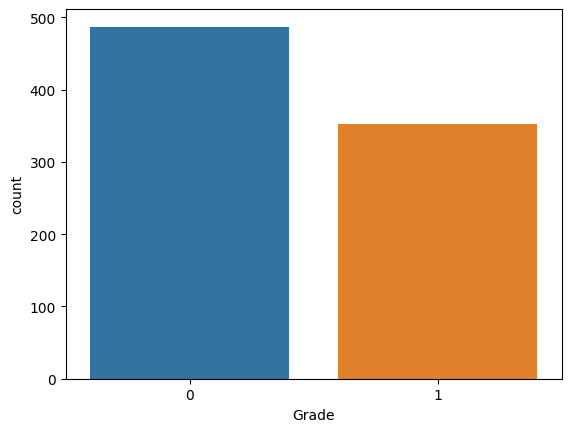

In [ ]:
sns.countplot(df, x= 'Grade')

In [ ]:
df['Grade'].value_counts()

0    487
1    352
Name: Grade, dtype: int64

In [ ]:
(df['Grade'] == 0).sum() / (df['Grade'] == 1).sum()

1.3835227272727273

As classes da variável alvo estão levemente desbalanceados, o que pode dificultar a correta classificação do modelo em novos dados, levando a uma tendência para a classe de maior prevalência. Isso deve ser levado em conta, quando o modelo for produzido.

<Axes: xlabel='Age_at_diagnosis', ylabel='Count'>

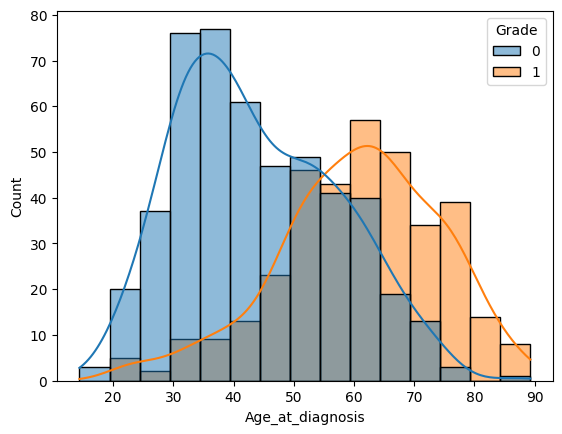

In [ ]:
sns.histplot(df, x= 'Age_at_diagnosis', kde=True, hue = 'Grade')

Podemos observar que o LGG (Lower-Grade Glioma) tem, em média, uma idade de diagnóstico mais baixa, e GBM (Glioblastoma Multiforme) tem, em média, idade diagnóstica maior. Há uma correlação entre a idade de diagnóstico e a severidade do tumor?

In [ ]:
mean_age_by_grade = df.groupby('Grade')['Age_at_diagnosis'].mean()
std_age_by_grade = df.groupby('Grade')['Age_at_diagnosis'].std()

print("Mean age at diagnosis by grade:")
for grade, mean_age in mean_age_by_grade.items():
    std_age = std_age_by_grade[grade]
    print(f"Grade {grade}: {mean_age:.2f} +- {std_age:.2f}")

Mean age at diagnosis by grade:
Grade 0: 43.87 +- 13.26
Grade 1: 60.70 +- 13.43


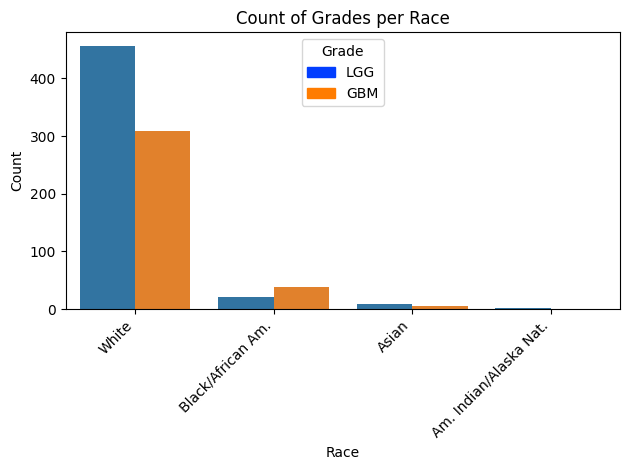

In [ ]:
import matplotlib.patches as mpatches

race_labels = {
    0: 'White',
    1: 'Black/African Am.',
    2: 'Asian',
    3: 'Am. Indian/Alaska Nat.'
}

# Group the data by Race and Grade and calculate the count
grouped_data = df.groupby(['Race', 'Grade']).size().reset_index(name='Count')

# Create a bar plot with color palette
sns.barplot(data=grouped_data, x='Race', y='Count', hue='Grade')

# Set the x-axis labels using the race_labels dictionary and rotate them
plt.xticks(ticks=range(len(race_labels)), labels=race_labels.values(), rotation=45, ha='right')

# Set the axis labels
plt.xlabel('Race')
plt.ylabel('Count')

# Set the plot title
plt.title('Count of Grades per Race')

# Create custom legend handles and labels
legend_labels = ['LGG', 'GBM']
colors = sns.color_palette('bright')[:len(legend_labels)]
legend_handles = [mpatches.Patch(color=color, label=label) for color, label in zip(colors, legend_labels)]

# Add the custom legend
plt.legend(handles=legend_handles, title='Grade')

# Display the plot
plt.tight_layout()
plt.show()

Podemos observar que há um desbalanço nos dados de raça, uma vez que há poucos registros em raças não-brancas. São inúmeras as possibilidades para esse desbalanço, entre elas a vulnerabilidade socio-econômica, que pode impossibilitar o acesso aos grandes centros de diagnóstico. A variável Race, portanto, pode trazer à análise um viés de seleção, uma vez que não sabemos se esse tipo de tumor realmente ocorre mais em raças brancas ou se temos apenas poucos registros destes tumores em outras raças. Não utilizaremos, portanto, essa variável.

In [ ]:
df.drop(['Race'], axis=1)

,Grade,Gender,Age_at_diagnosis,IDH1,TP53,ATRX,PTEN,EGFR,CIC,MUC16,PIK3CA,NF1,PIK3R1,FUBP1,RB1,NOTCH1,BCOR,CSMD3,SMARCA4,GRIN2A,IDH2,FAT4,PDGFRA
0,0,0,51.30,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
1,0,0,38.72,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,35.17,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,1,32.78,1,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0
4,0,0,31.51,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
834,1,1,77.89,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
835,1,0,85.18,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
836,1,1,77.49,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
837,1,0,63.33,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0


## **MACHINE LEARNING**

Divisão dos dados em treino/teste.

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
y = df['Grade']
X = df.drop(['Grade'], axis=1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
predictions = logmodel.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay

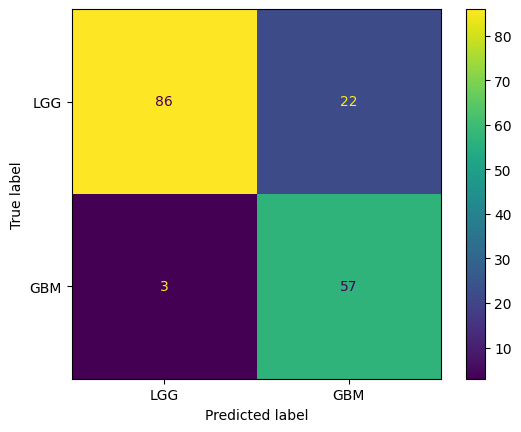

In [ ]:
cm = confusion_matrix(y_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=['LGG', 'GBM'])
disp.plot()

In [ ]:
from sklearn.metrics import roc_auc_score

roc_auc = roc_auc_score(y_test,predictions)

print(roc_auc)

0.8731481481481481


Como há um leve desbalanço nos dados e a classe positiva é a mais importante (GBM), a métrica de avaliação deve ser o F1-score ou ROC-AUC.

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
rfc_pred = rfc.predict(X_test)

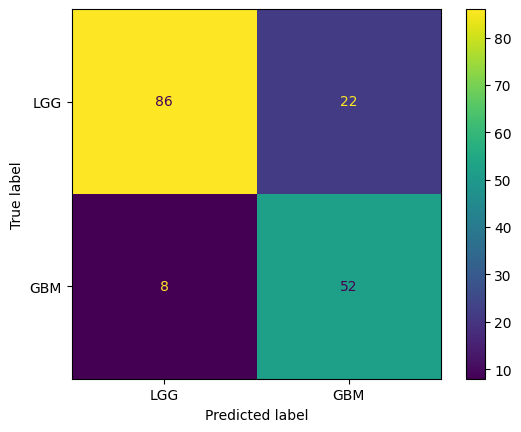

In [ ]:
cm = confusion_matrix(y_test, rfc_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=['LGG', 'GBM'])
disp.plot()

In [ ]:
roc_auc = roc_auc_score(y_test,rfc_pred)

print(roc_auc)

0.8314814814814815


Random Forest tem uma performance pior do que a Regressão Logística. Vamos tentar modificar os parâmetros.

In [ ]:
parameters = {
  "n_estimators":[5,10,50,100,250],
  "max_depth":[2,4,8,16,32,None]

}

In [ ]:
from sklearn.model_selection import GridSearchCV

cv = GridSearchCV(rfc,parameters,cv=5)
cv.fit(X_train, y_train.values.ravel())

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [2, 4, 8, 16, 32, None],
                         'n_estimators': [5, 10, 50, 100, 250]})

In [ ]:
def display(results):
  print(f'Best parameters are: {results.best_params_}')
  print("\n")
  mean_score = results.cv_results_['mean_test_score']
  std_score = results.cv_results_['std_test_score']
  params = results.cv_results_['params']
  for mean,std,params in zip(mean_score,std_score,params):
      print(f'{round(mean,3)} + or -{round(std,3)} for the {params}')

In [ ]:
display(cv)

Best parameters are: {'max_depth': 4, 'n_estimators': 50}


0.847 + or -0.023 for the {'max_depth': 2, 'n_estimators': 5}
0.856 + or -0.031 for the {'max_depth': 2, 'n_estimators': 10}
0.875 + or -0.034 for the {'max_depth': 2, 'n_estimators': 50}
0.87 + or -0.028 for the {'max_depth': 2, 'n_estimators': 100}
0.873 + or -0.029 for the {'max_depth': 2, 'n_estimators': 250}
0.855 + or -0.019 for the {'max_depth': 4, 'n_estimators': 5}
0.872 + or -0.03 for the {'max_depth': 4, 'n_estimators': 10}
0.876 + or -0.03 for the {'max_depth': 4, 'n_estimators': 50}
0.875 + or -0.026 for the {'max_depth': 4, 'n_estimators': 100}
0.87 + or -0.027 for the {'max_depth': 4, 'n_estimators': 250}
0.87 + or -0.027 for the {'max_depth': 8, 'n_estimators': 5}
0.86 + or -0.027 for the {'max_depth': 8, 'n_estimators': 10}
0.873 + or -0.028 for the {'max_depth': 8, 'n_estimators': 50}
0.873 + or -0.024 for the {'max_depth': 8, 'n_estimators': 100}
0.875 + or -0.026 for the {'max_depth': 8, 'n_estimators': 250

In [ ]:
rfc = RandomForestClassifier(max_depth = 4, n_estimators= 100)
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=4)

In [ ]:
rfc_pred = rfc.predict(X_test)

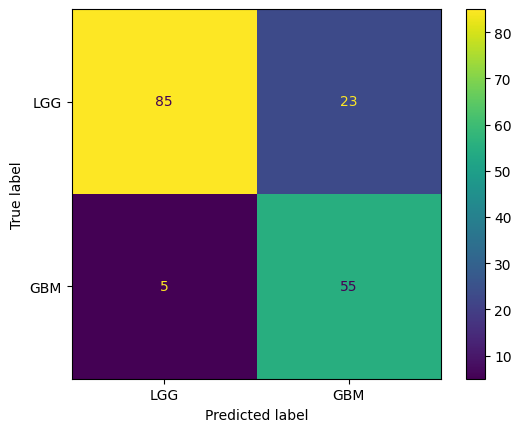

In [ ]:
cm = confusion_matrix(y_test, rfc_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=['LGG', 'GBM'])
disp.plot()

In [ ]:
roc_auc = roc_auc_score(y_test,rfc_pred)

print(roc_auc)

0.8518518518518517


Ficou semelhante à RL.

## *FAZER DO TREINO - OVERFITTING

## CatBoost

In [ ]:
pip install catboost

In [ ]:
from catboost import CatBoostClassifier

cbc = CatBoostClassifier()
cbc.fit(X, y, verbose=10)

Learning rate set to 0.009558
0:	learn: 0.6846966	total: 6.76ms	remaining: 6.75s
10:	learn: 0.6120603	total: 62.3ms	remaining: 5.6s
20:	learn: 0.5538368	total: 107ms	remaining: 4.99s
30:	learn: 0.5092529	total: 165ms	remaining: 5.17s
40:	learn: 0.4722499	total: 238ms	remaining: 5.57s
50:	learn: 0.4435297	total: 269ms	remaining: 5.01s
60:	learn: 0.4215579	total: 289ms	remaining: 4.45s
70:	learn: 0.4019981	total: 332ms	remaining: 4.34s
80:	learn: 0.3851631	total: 356ms	remaining: 4.04s
90:	learn: 0.3720434	total: 399ms	remaining: 3.99s
100:	learn: 0.3615696	total: 448ms	remaining: 3.98s
110:	learn: 0.3519451	total: 486ms	remaining: 3.89s
120:	learn: 0.3446904	total: 545ms	remaining: 3.96s
130:	learn: 0.3379196	total: 601ms	remaining: 3.98s
140:	learn: 0.3320652	total: 647ms	remaining: 3.94s
150:	learn: 0.3265463	total: 697ms	remaining: 3.92s
160:	learn: 0.3211781	total: 726ms	remaining: 3.79s
170:	learn: 0.3167851	total: 779ms	remaining: 3.78s
180:	learn: 0.3131220	total: 814ms	remaining

In [ ]:
cbc.predict_proba(X)

array([[0.97320843, 0.02679157],
       [0.99124119, 0.00875881],
       [0.93471612, 0.06528388],
       ...,
       [0.00698641, 0.99301359],
       [0.07508723, 0.92491277],
       [0.04725715, 0.95274285]])

primeiro objeto: probabilidade de ser 0;
segundo objeto: probabilidade de ser 1;

In [ ]:
cbc_pred = cbc.predict(X_test)

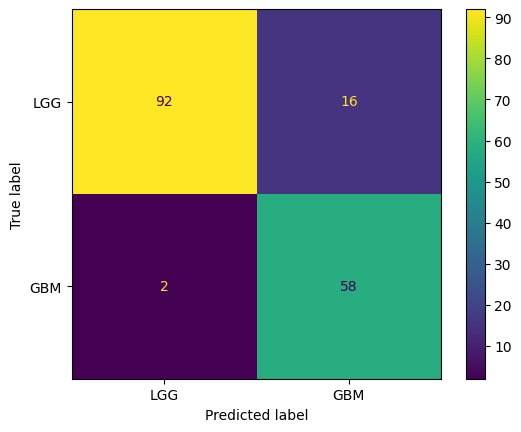

In [ ]:
cm = confusion_matrix(y_test, cbc_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=['LGG', 'GBM'])
disp.plot()

In [ ]:
roc_auc = roc_auc_score(y_test,cbc_pred)

print(roc_auc)

0.9092592592592593


Levemente melhor que a RL.

ROC AUC dados teste:

In [ ]:
#retorna a pontuação (score) do modelo otimizado pela busca de hiperparâmetros, quando avaliado nos dados de teste (X_test e y_test).
#roc_auc_test = opt.score(X_test, y_test)

#print("Pontuação ROC AUC nos dados de teste:", roc_auc_test)

In [ ]:
#from xgboost import plot_importance

#xgboost_step = opt.best_estimator_.steps[0]
#xgboost_model = xgboost_step[1]
#plot_importance(xgboost_model)